<ipython-input-2-32a9dabf4afe>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:,1], s = 50, cmap = 'virdis')


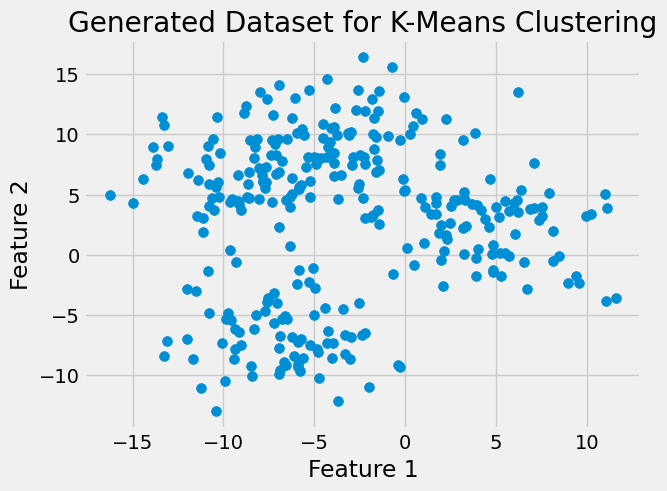

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.datasets import make_blobs

#Parameters
n_samples = 300
n_features = 2
centers = 4

 #Generate data
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=3, random_state=42)

#Visualize the data
plt.scatter(X[:, 0], X[:,1], s = 50, cmap = 'virdis')
plt.title("Generated Dataset for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [3]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_init = 10, n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

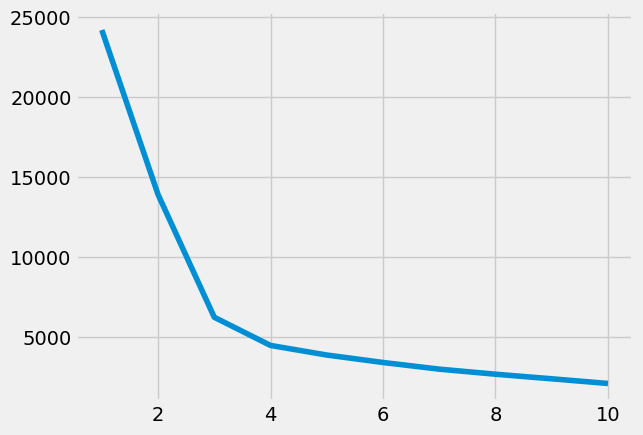

In [4]:
plt.plot(range(1,11),wcss)

In [5]:
from sklearn.metrics import silhouette_score
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

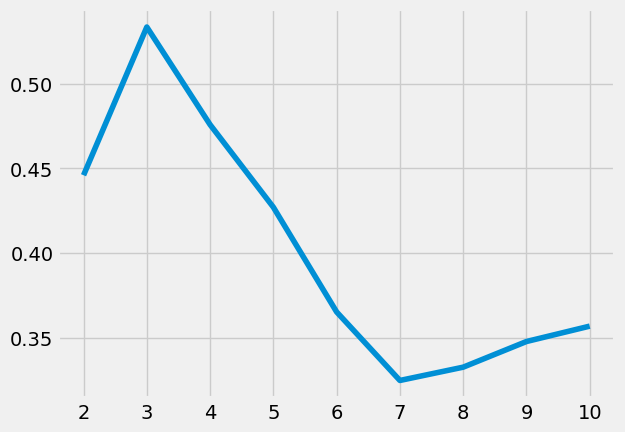

In [6]:
plt.plot(range(2,11),sil)

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_init = 10, n_clusters = 4, verbose=100)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 8375.921004300213.
Iteration 1, inertia 4889.016018238834.
Iteration 2, inertia 4664.835382307595.
Iteration 3, inertia 4570.113744053927.
Iteration 4, inertia 4521.120738498696.
Iteration 5, inertia 4492.562586381868.
Iteration 6, inertia 4477.333098866022.
Iteration 7, inertia 4475.918395021896.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 8183.552581292501.
Iteration 1, inertia 4986.584943199212.
Iteration 2, inertia 4537.496627565568.
Iteration 3, inertia 4516.564315784186.
Iteration 4, inertia 4502.292265773569.
Iteration 5, inertia 4489.425558875597.
Iteration 6, inertia 4480.471438687802.
Iteration 7, inertia 4475.918395021896.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 7691.500544122613.
Iteration 1, inertia 5540.812826696074.
Iteration 2, inertia 5338.620524235516.
Iteration 3, inertia 5249.437965332119.
Iteration 4, inertia 5095.9660156757

KMeans(n_clusters=4, n_init=10, verbose=100)

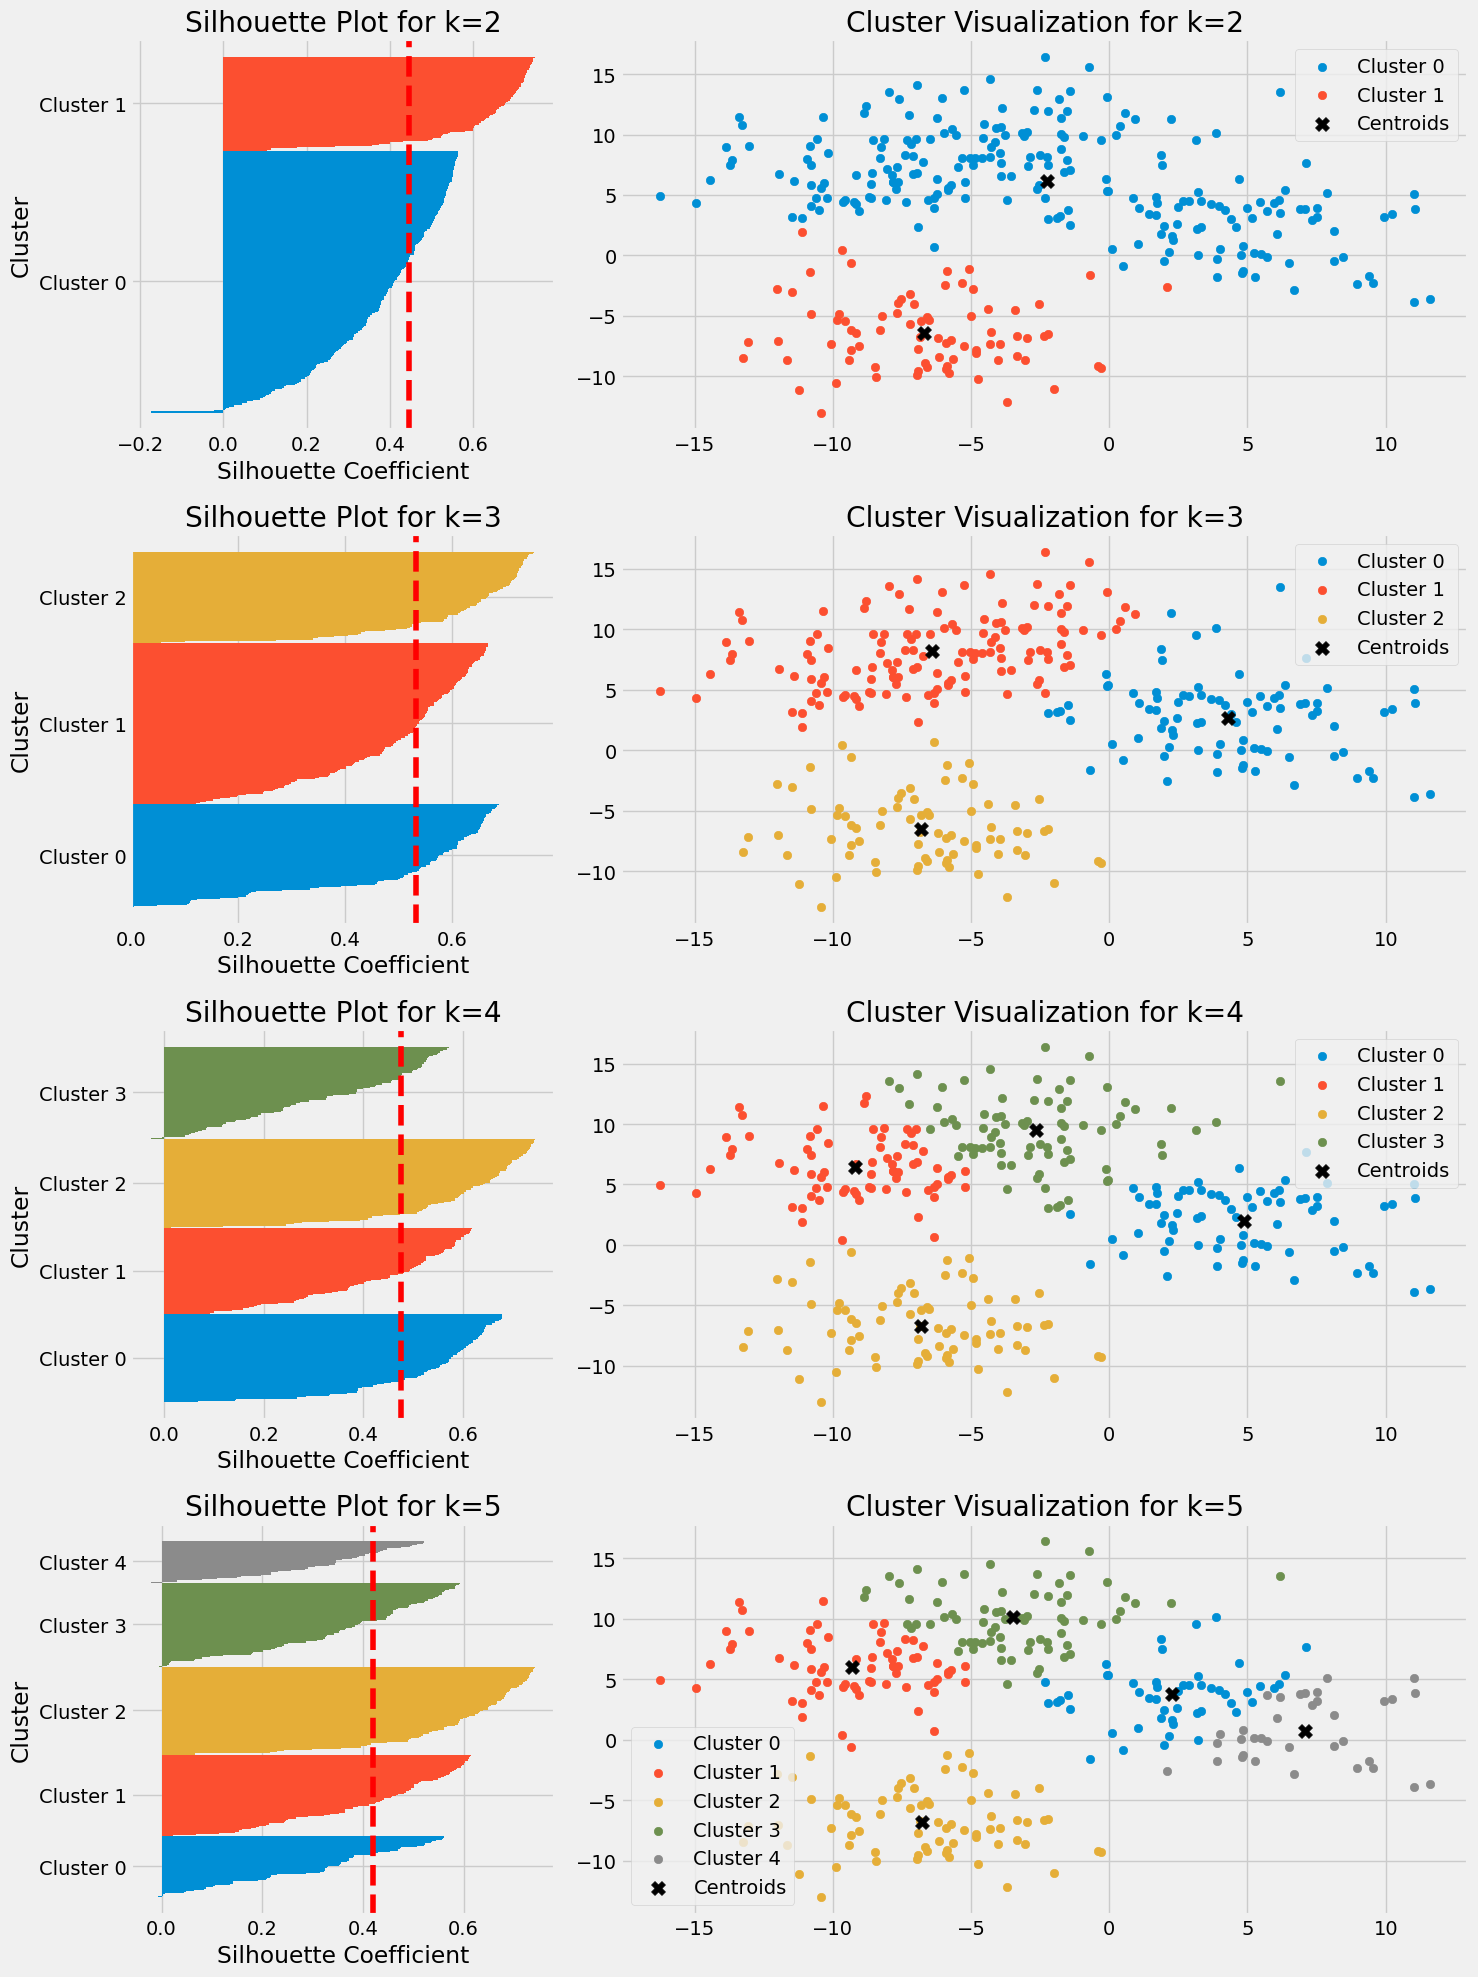

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np


# Setting up the subplot grid
fig = plt.figure(figsize=(15, 20))
gs = gridspec.GridSpec(4, 2, width_ratios=[1, 2])

# Creating silhouette and scatter plots for different values of k (2, 3, 4, 5)
for i, k in enumerate([2, 3, 4, 5]):
    # Clustering with k-means
    kmeans = KMeans(n_init=10, n_clusters=k, random_state=10)
    cluster_labels = kmeans.fit_predict(X)

    # Silhouette values
    silhouette_vals = silhouette_samples(X, cluster_labels)
    avg_score = silhouette_score(X, cluster_labels)

    # Silhouette plot
    ax1 = plt.subplot(gs[i, 0])
    y_lower, y_upper = 0, 0
    yticks = []
    for j, cluster in enumerate(np.unique(cluster_labels)):
        cluster_silhouette_vals = silhouette_vals[cluster_labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        yticks.append((y_lower + y_upper) / 2)
        y_lower += len(cluster_silhouette_vals)
    ax1.axvline(avg_score, color="red", linestyle="--")
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([f'Cluster {x}' for x in np.unique(cluster_labels)])
    ax1.set_ylabel('Cluster')
    ax1.set_xlabel('Silhouette Coefficient')
    ax1.set_title(f'Silhouette Plot for k={k}')

    # Scatter plot
    ax2 = plt.subplot(gs[i, 1])
    for j in np.unique(cluster_labels):
        ax2.scatter(X[cluster_labels == j, 0], X[cluster_labels == j, 1], label=f'Cluster {j}')
    ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='X', label='Centroids')
    ax2.set_title(f'Cluster Visualization for k={k}')
    ax2.legend()

plt.tight_layout()
plt.show()

In [9]:
y_kmeans = kmeans.fit_predict(X)

In [10]:
y_kmeans

array([1, 1, 0, 2, 1, 2, 0, 2, 3, 0, 3, 4, 0, 1, 1, 3, 1, 0, 3, 3, 4, 3,
       2, 1, 3, 3, 1, 1, 2, 0, 3, 0, 1, 4, 1, 3, 1, 2, 1, 2, 4, 3, 1, 2,
       3, 3, 1, 0, 1, 4, 2, 3, 2, 0, 2, 3, 1, 4, 0, 3, 1, 4, 4, 3, 2, 2,
       2, 2, 2, 3, 2, 2, 1, 4, 3, 1, 2, 2, 3, 2, 3, 3, 1, 3, 2, 1, 3, 4,
       4, 0, 1, 3, 1, 3, 3, 1, 2, 3, 1, 3, 0, 4, 4, 0, 3, 0, 0, 3, 2, 1,
       4, 3, 3, 0, 3, 4, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 3, 3, 1, 2, 4, 1,
       0, 1, 1, 0, 4, 1, 3, 2, 3, 4, 0, 3, 0, 0, 4, 0, 2, 3, 1, 3, 4, 2,
       3, 0, 2, 1, 1, 0, 1, 1, 2, 1, 4, 1, 2, 3, 3, 0, 3, 3, 2, 0, 0, 2,
       2, 0, 4, 2, 1, 3, 1, 4, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 4,
       0, 1, 3, 3, 2, 0, 3, 2, 2, 1, 2, 3, 3, 2, 2, 0, 1, 2, 3, 1, 1, 1,
       1, 2, 1, 2, 0, 0, 1, 3, 0, 0, 0, 3, 3, 2, 4, 2, 1, 0, 3, 1, 3, 2,
       2, 4, 3, 2, 2, 2, 1, 2, 1, 2, 1, 4, 2, 1, 0, 3, 1, 3, 0, 3, 1, 3,
       2, 0, 2, 4, 4, 3, 3, 2, 0, 4, 1, 1, 2, 1, 0, 4, 0, 0, 4, 2, 1, 4,
       2, 4, 0, 2, 3, 2, 4, 3, 1, 3, 0, 3, 3, 3], d

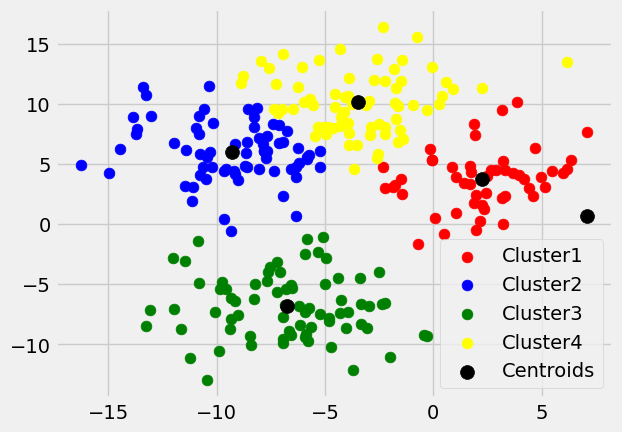

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'yellow', label = 'Cluster4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

plt.show()

# **Assignment**

**Assignment Overview :**


*   Dataset : IPL Dataset (focusing on batsmen's performance)
*   Objective : Create new features for batsman strike rate and average, and perform k-means clustering on these features for players who have faced a minimum of 100 balls


# **Steps :**


1.   **Data Preparation:**

    *   Import the IPL dataset. Ensure it contains detailed batting statistics for each player.
    *   Filter out players who have faced less than 100 balls to focus on a subset of more regular batsman.


2.   Feature Engineering


    *   **Batting Average:** Calculate each player's batting average. It's defined as the total number of runs scored divide by the number of times they have been out.
    Batting Average = (Total Run / Balls Faced) * 100
    
    *   **Strike Rate:** Calculate the strike rate, which is typically the number  of runs scored per 100 balls faced.
    Strike Rate = (Total Runs / Balls Faced) * 100

3. **Exploratory Data Analysis (EDA):**
    

  *   Visualize the distributation of the newly created features.
  *   Identify any outliers or anormalies in the data.

4. **K-Mean Clustering :**


  *   Determine the optimal number of clusters using methods like the Elbow Method.
  *   Apply k-means clustering based on the batting average and strike rate.
  *   Analyze the centeroids to understand the characteristics of each cluster.

5. **Cluster Analysis and Interpretation:**


  *   Visualize the clusters using a scatter plot with batting average on one axis and strike rate on the other.
  *   Interpret the characteristics of each cluster (e.g consistent performers, aggressive hittlers, etc.)
  *   Relate these findings to real-world cricket strategies and player roles.










In [12]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import time

# Generating synthetic data for clustering
n_samples = 100000
n_features = 10
n_clusters = 5
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters)

# Function to measure time taken by KMeans using different algorithms
def measure_kmeans_time(algorithm):
    kmeans = KMeans(n_clusters=n_clusters, algorithm=algorithm, random_state=0)
    start_time = time.time()
    kmeans.fit(X)
    return time.time() - start_time

# Measuring time for Lloyd's algorithm
lloyd_time = measure_kmeans_time('full')

# Measuring time for Elkan's algorithm
elkan_time = measure_kmeans_time('elkan')

lloyd_time, elkan_time



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(0.9872081279754639, 1.20220947265625)